# **How the EURO 2024 Player Analysis Model Works ?**
This model ranks the best players of EURO 2024 based on key performance metrics, not just goals or assists. The idea is to think like a football analyst and go beyond surface-level stats.

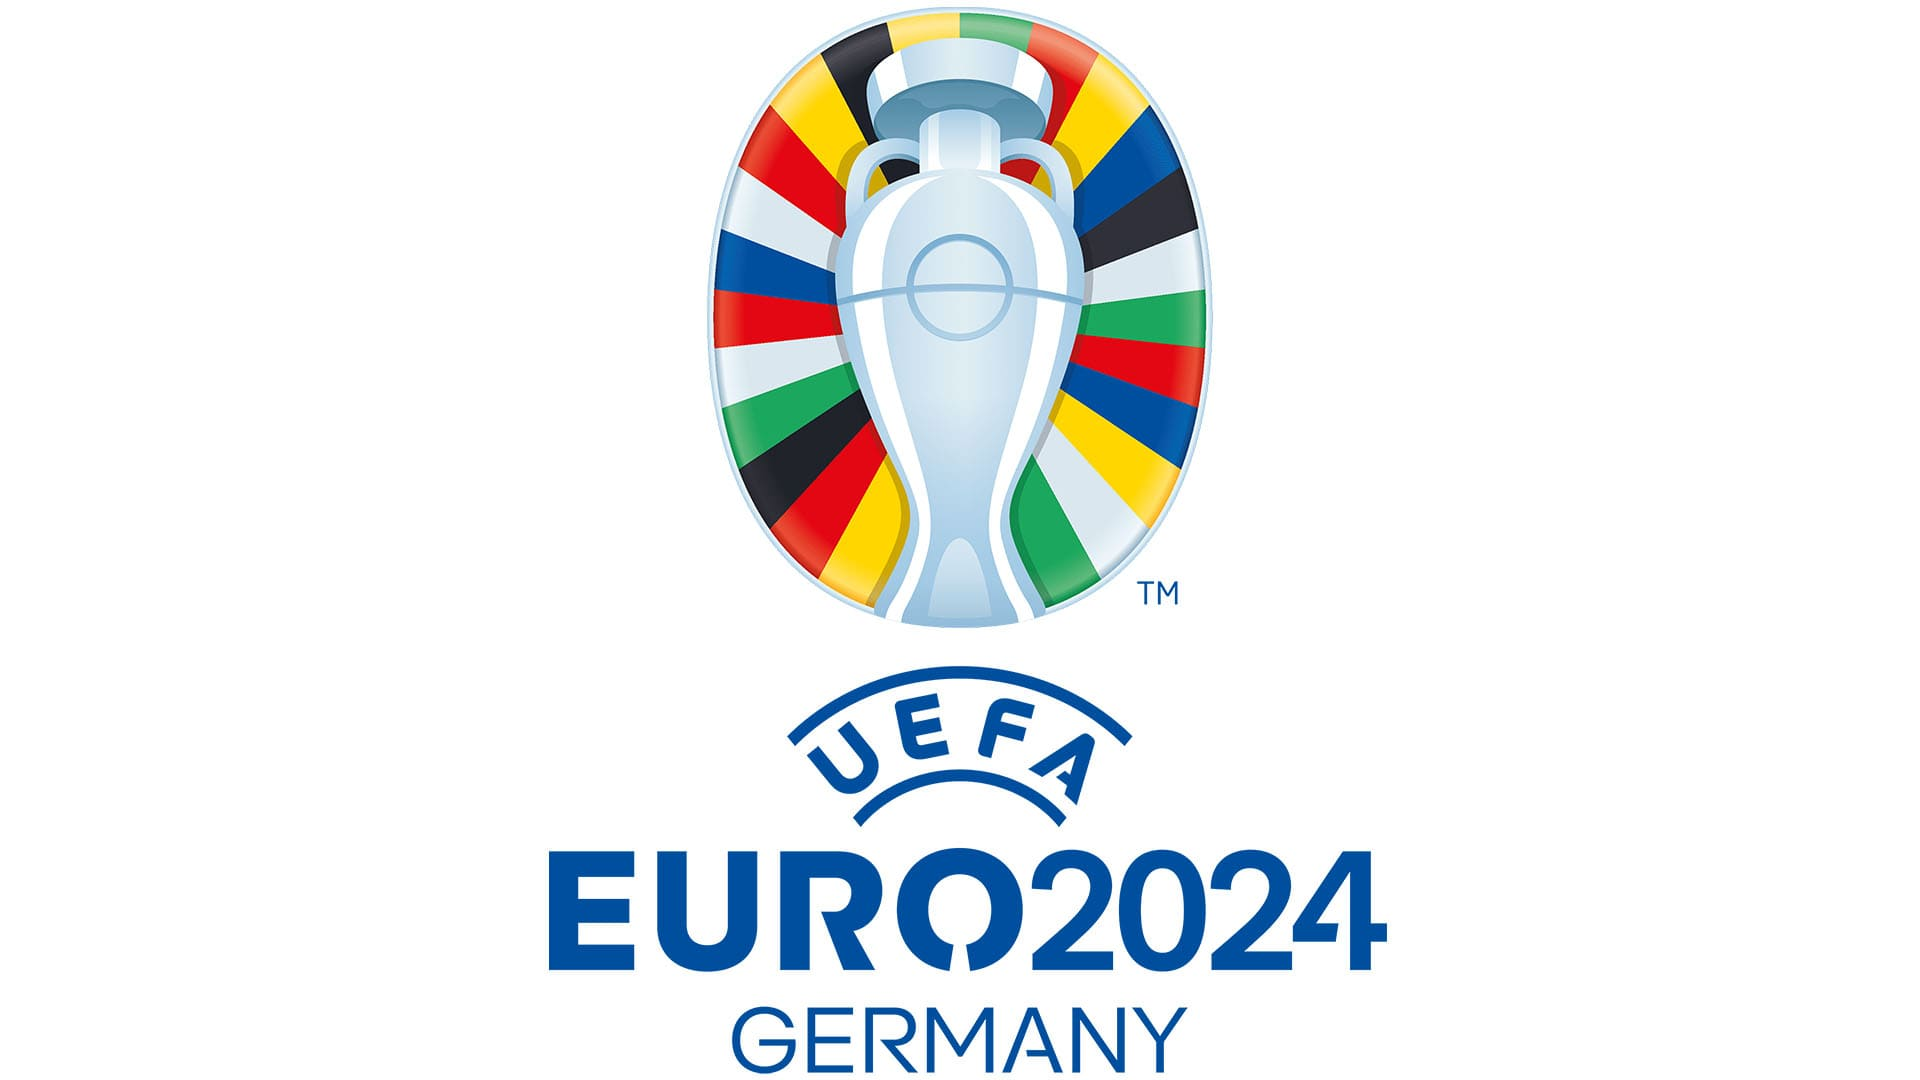

In [ ]:
!pip install pd
!pip install IPython

In [ ]:
import pandas as pd
import re
from IPython.display import display
import difflib
import unicodedata

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/alielsamra2004/EURO2024-PLAYER-ANALYSIS/main/euro_2024.csv")

In [ ]:
df.head()

In [ ]:
import difflib
import unicodedata

def normalize(text):
    """Lowercase and remove accents."""
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode('utf-8')
    return text.lower().strip()

def is_close_match(guess, actual):
    guess = normalize(guess)
    actual = normalize(actual)
    actual_parts = actual.split()

    # Exact or partial match
    if guess == actual or guess in actual_parts:
        return True

    # Fuzzy full name
    if difflib.SequenceMatcher(None, guess, actual).ratio() >= 0.85:
        return True

    # Fuzzy first/last name
    for part in actual_parts:
        if difflib.SequenceMatcher(None, guess, part).ratio() >= 0.85:
            return True

    return False

def find_best_match(guess, player_list):
    """Return best match from the player list using is_close_match"""
    for player in player_list:
        if is_close_match(guess, player):
            return player
    return None



---





---

## 🧠 Warm-Up: Mystery Player Challenge

Let’s kick things off with a quick test of your **football instincts**.

You’ll see **4 mystery player cards** below — no names, just raw stats. These aren’t just any players — each one made a real impact during EURO 2024, either with goals, assists, or standout performances.

Your mission:

👀 **Study the stats**  
📝 **Guess the names** — first name, last name, or both  
🎯 **Score yourself** and see how well you really know your EURO ballers

You’ll have to think like a scout.  
No hype. No media. Just data.



In [ ]:
# Filter standout players
filtered_df = df[
    (df['Min'] >= 200) &
    ((df['Gls'] >= 3) | (df['Ast'] >= 3) | (df['G+A'] >= 4))
]

# Randomly pick 4 players
mystery_players = filtered_df.sample(4, random_state=37)

# Save their real names for later reveal
true_names = mystery_players['Player'].tolist()

# Build the mystery cards
mystery_cards = mystery_players[[
    'Squad', 'Pos', 'Age', 'Min', 'Gls', 'Ast', 'G+A', 'Gls.1', 'Ast.1', 'G+A.1'
]].reset_index(drop=True)

# Rename for clarity
mystery_cards.columns = [
    'Country', 'Position', 'Age', 'Minutes', 'Goals', 'Assists', 'G+A',
    'Goals/90', 'Assists/90', 'G+A/90'
]

# Name the rows
mystery_cards.index = [f"Mystery Player {i+1}" for i in range(4)]

# Display as a clean table
display(mystery_cards.style.set_caption("🕵️‍♂️  Mystery Player Cards — Can you guess who they are?"))

---
### 📝 Guess the Mystery Players!
You've seen the stats — now it’s your turn to play scout.

Type your guesses for each mystery player based on their performance.  
✅ You’ll get credit for:
- First names
- Last names
- Slight typos (we’re nice like that 😉)

After you guess, we’ll reveal who they really were — and how well you did!
Let's see who really watched the games. ⚽🔥


In [ ]:

# User guesses
guesses = []
print("\n💬 Type your guesses for who you think each mystery player is:")

for i in range(4):
    guess = input(f"Who is Mystery Player {i+1}? ")
    guesses.append(guess.strip().lower())

# Score and feedback
print("\n🧠 Let's see how you did!\n")
for i, (guess, actual) in enumerate(zip(guesses, true_names)):
    correct = is_close_match(guess, actual)
    result = f"✅ Correct! It was {actual}" if correct else f"❌ Nope! It was {actual}"
    print(f"Mystery Player {i+1}: {result}")




---



---

## 🗳️ Pick the Best Player — Audience vs Data

We’ve shown you 4 Mystery Player Cards. Now it’s your turn to decide...

👉 **Who do YOU think is the best player among the four?**

🔗 **Cast your vote here**: [Click to vote on Mentimeter](https://www.menti.com/alqgiheyxk84)

⏳ You have **2 minutes** to vote. Don’t overthink it — trust your football instincts!

After voting, we’ll:
- Reveal the **audience leaderboard**
- Show the **data-driven rankings**
- Uncover the twist:  
  🧨 **One is overhyped** (big name, weak stats)  
  🕶️ **One is underrated** (low profile, elite stats)

### 🌟 Audience Reputation Ratings


In [ ]:
2
# Rate each player's reputation
print("🎤 Audience Poll: Rate each player’s reputation (1 = unknown, 10 = superstar)")

reputation_map = {}
for player in mystery_players['Player']:
    while True:
        try:
            score = int(input(f"\n🔢 Reputation for {player}: "))
            if 1 <= score <= 10:
                reputation_map[player] = score
                break
            else:
                print("⚠️ Please enter a number between 1 and 10.")
        except:
            print("⚠️ Invalid input. Please enter a number.")

### 🤞 Reveal the twist: Overhyped vs Underrated


In [ ]:

# Map reputation into the mystery players DataFrame
mystery_players['Reputation'] = mystery_players['Player'].map(reputation_map)

# Use G+A per 90 minutes as performance score
mystery_players['Performance'] = mystery_players['G+A.1']

# Calculate the "Hype Gap" = Reputation - Performance
mystery_players['HypeGap'] = mystery_players['Reputation'] - mystery_players['Performance']

# Find overhyped and underrated players
overhyped = mystery_players.sort_values('HypeGap', ascending=False).iloc[0]
underrated = mystery_players.sort_values('HypeGap').iloc[0]

# Show the twist
print("\n🎭 The Twist is revealed!\n")

print(f"🧨 Overhyped: {overhyped['Player']} ({overhyped['Squad']})")
print(f"   Reputation: {overhyped['Reputation']} | Performance: {overhyped['Performance']:.2f} G+A/90")

print(f"\n🕶️ Underrated: {underrated['Player']} ({underrated['Squad']})")
print(f"   Reputation: {underrated['Reputation']} | Performance: {underrated['Performance']:.2f} G+A/90")

---

---
## 🧠 The Truth Revealed — Data vs Public Opinion

It's time to set the record straight.

Using real in-tournament performance data, we've built a custom **Player Performance Score** to rank the best players of EURO 2024 — based not on name recognition or media hype, but on **actual contributions**.

Our model considers:
- ⚽ **Goals + Assists per 90 minutes**
- 🕒 **Minutes played** (consistency matters!)
- 📊 **Total goal contributions**

This gives us a fair, balanced view of which players truly delivered — regardless of how famous they are.


### 🏆 Below are the **Top 10 Performers** according to the data.

Let’s compare this with your guesses and public opinion from earlier:
- Did the audience get it right?
- Were some players overhyped?
- Any underrated gems shining through?

Get ready for some surprises.

In [ ]:
# Step 1: Build performance score
# Make sure columns are numeric
for col in ['G+A.1', 'G+A', 'Min', 'Gls', 'Ast']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove players who played less than 100 minutes
df = df[df['Min'] >= 100].copy()

# Calculate the performance score
df['PerformanceScore'] = (
    df['G+A.1'] * 50 +    # weighted per-90 goal involvement
    df['G+A'] * 2 +       # total G+A
    df['Min'] / 10        # minutes for consistency
)

# Step 2: Get top 10 players
top10 = df.sort_values('PerformanceScore', ascending=False).head(10).copy()

# Select key columns to show
top10_display = top10[[
    'Player', 'Squad', 'Pos', 'Min', 'Gls', 'Ast', 'G+A', 'G+A.1', 'PerformanceScore'
]].reset_index(drop=True)

# Round for readability
top10_display['PerformanceScore'] = top10_display['PerformanceScore'].round(2)
top10_display['G+A.1'] = top10_display['G+A.1'].round(2)
top10_display.index = [f"Rank {i}" for i in range(1, len(top10_display) + 1)]


# 🏆 Step 3: Display it
display(top10_display.style.set_caption("🏆 Top 10 Players — Model-Based Ranking"))

---

---
## ⚔️ Player vs Player Showdown — 1v1 Face-Off!

It’s time for a head-to-head battle between two standout EURO 2024 players.

We’ll show you their stats side-by-side.  
Now you decide:

🗳️ **Who would you sign for your team?**  
🌟 **Who has a better future?**


### 🔗 **Cast your vote here**: [Click to vote on Mentimeter](https://www.menti.com/alqgiheyxk84)

Let the audience decide the winner — and see if the data agrees with the public opinion.

At the end of the poll, we’ll reveal:
- 🧠 What the data model says
- 🔀 Whether the audience chose based on hype or stats
- 🏆 Who really comes out on top

**Let the showdown begin!**

### ⚔️ Pre-Selected 1v1 Showdown: Lamine Yamal vs. Jude Bellingham
This section compares two high-profile EURO 2024 players side-by-side based on key stats and reveals how they performed according to our model.

In [ ]:
# 🎯 Select the two players
players_to_compare = ['Lamine Yamal', 'Jude Bellingham']

# Filter from your DataFrame
duel_df = df[df['Player'].isin(players_to_compare)].copy()

# Select columns to compare
comparison_df = duel_df[[
    'Player', 'Squad', 'Pos', 'Age', 'Min', 'Gls', 'Ast', 'G+A', 'G+A.1', 'PerformanceScore']].reset_index(drop=True)

# Transpose for side-by-side comparison
comparison_table = comparison_df.set_index('Player').T

# Rename for clarity
comparison_table.columns = ['🧠 Jude Bellingham', '🔥 Lamine Yamal']

# Display
from IPython.display import display
display(comparison_table.style.set_caption("⚔️ 1v1 Showdown — Lamine Yamal vs. Jude Bellingham"))

### 🗳️ Audience-Picked 1v1 Showdown
Enter any two player names from the tournament and see their stats compared side-by-side. Once both are displayed, the model will reveal which one performed better — based on real data, not hype.

In [ ]:
# ⚔️ Audience-Picked 1v1 Showdown (with fuzzy matching)
print("⚔️ Player vs Player Showdown — Choose Two Players to Compare!")

# Get all player names
all_players = df['Player'].unique().tolist()

# Input and fuzzy match Player 1
guess1 = input("🔎 Enter name of Player 1: ").strip()
player1 = find_best_match(guess1, all_players)

# Input and fuzzy match Player 2
guess2 = input("🔎 Enter name of Player 2: ").strip()
player2 = find_best_match(guess2, all_players)

# Check and display
if not player1 or not player2:
    print("⚠️ One or both players could not be matched. Please try again.")
else:
    print(f"\n✅ Comparing: {player1} vs {player2}")

    duel_df = df[df['Player'].isin([player1, player2])].copy()

    comparison_df = duel_df[[
        'Player', 'Squad', 'Pos', 'Age', 'Min', 'Gls', 'Ast', 'G+A', 'G+A.1', 'PerformanceScore'
    ]].reset_index(drop=True)

    # Side-by-side display
    comparison_table = comparison_df.set_index('Player').T
    comparison_table.columns = [f"👤 {name}" for name in comparison_table.columns]

    from IPython.display import display
    display(comparison_table.style.set_caption("⚔️ 1v1 Showdown — Audience Picked"))

    # Model Verdict
    winner = comparison_df.sort_values('PerformanceScore', ascending=False).iloc[0]
    print("\n🧠 Model Verdict:")
    print(f"🏆 Based on performance stats, the better player is: **{winner['Player']}**")
    print(f"   (Performance Score: {winner['PerformanceScore']:.2f})")
    print("\n👥 Was the audience right?")
    print("💬 Discuss: Did you go with reputation or data?")

---

## 💬 Final Discussion — Let’s Talk:

* 🎯 Did the stats change your opinion about anyone?
* 🤔 Did reputation cloud your judgment in earlier rounds?
* 👀 Will you look at players differently after this?